In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine, make_blobs, make_moons
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import time


def plotit(axs, x_data, y_data, line, ylabel, name, row, col):
    axs[row, col].plot(
        x_data,
        y_data,
        line,
    )
    axs[row, col].set_xlabel("k")
    axs[row, col].set_ylabel(ylabel)
    axs[row, col].set_title(name)
    axs[row, col].grid(True)


def plot_agglo(X_scaled, link_choice=str):
    score_s = []
    score_chs = []
    fig, axs = plt.subplots(5, 2)
    x, y = 0, 0
    for i in range(2, 11):
        Z = linkage(X_scaled, link_choice)
        y_pred = fcluster(Z=Z, t=i, criterion="maxclust")
        score_s.append(silhouette_score(X_scaled, y_pred))
        score_chs.append(calinski_harabasz_score(X_scaled, y_pred))

        axs[x, y].scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred)
        axs[x, y].set_title(f"Cluster = {i}")
        if (i - 1) % 2 == 0:
            x += 1
        y = (i - 1) % 2
    fig.set_size_inches(10, 15)
    fig.suptitle(f"Linkage = {link_choice}")
    plt.subplots_adjust(top=0.85)
    fig.tight_layout(h_pad=2)

    return score_s, score_chs

Problem 1

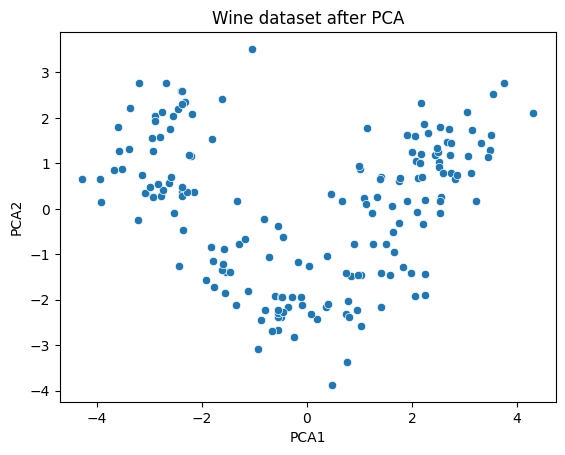

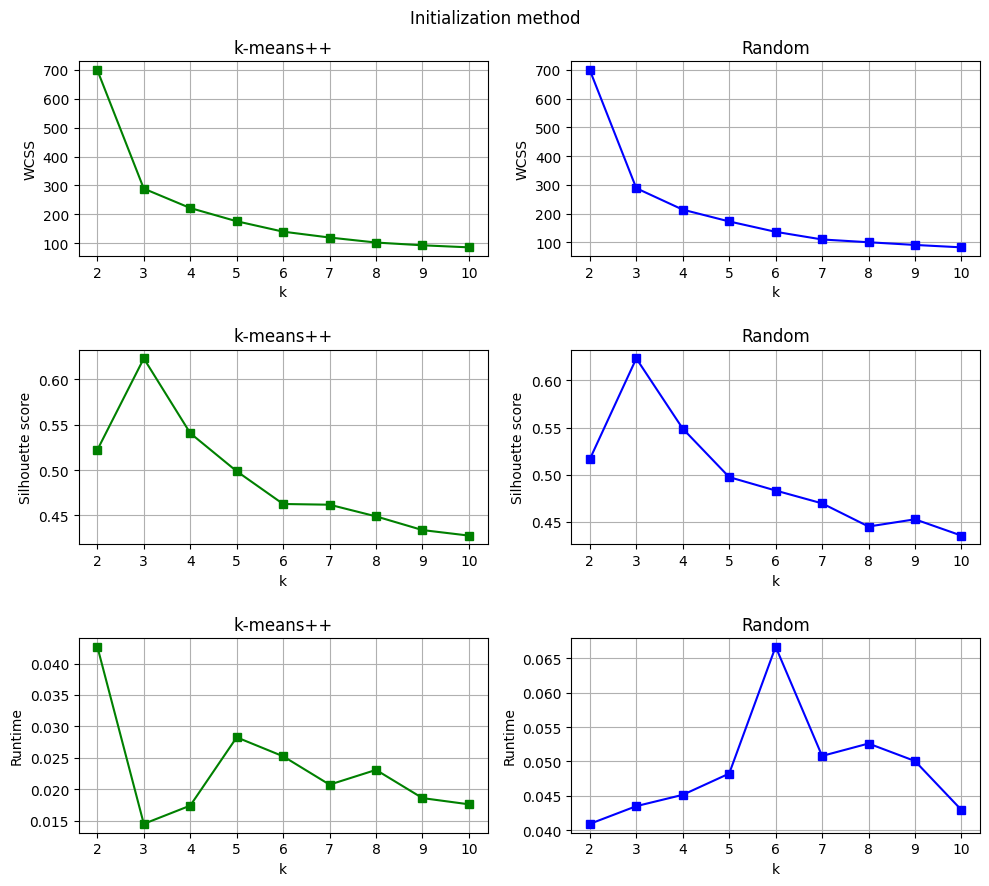

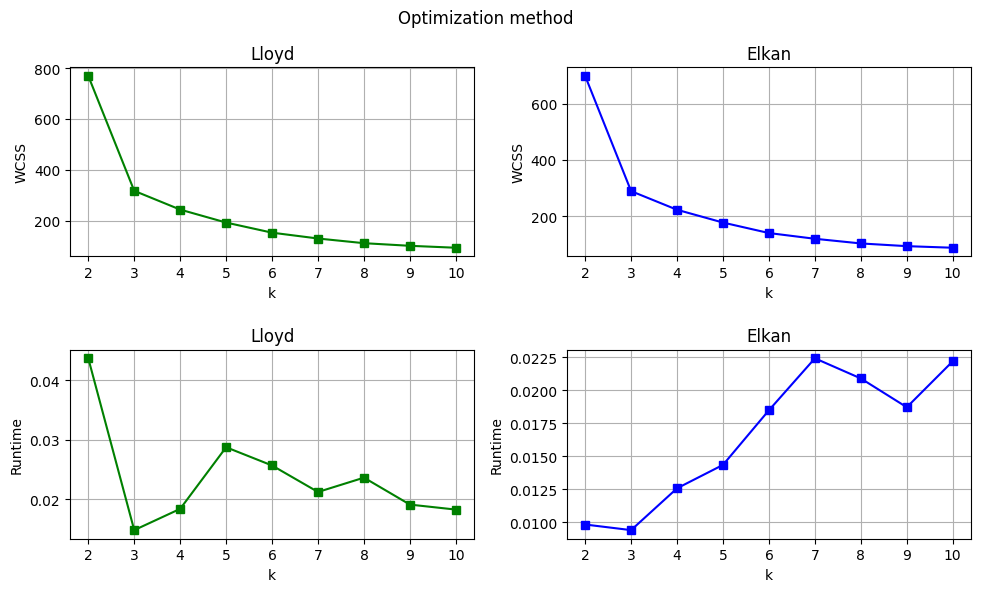

In [2]:
if __name__ == "__main__":
    # Part 1 ===========================================================
    # select wine data from sklearn.
    df = load_wine(as_frame=True)
    df = df.frame

    # drop the target column which is not being used for clustering.
    df.drop("target", axis=1, inplace=True)

    # scale features.
    scaler = StandardScaler()
    scaled_df = scaler.fit_transform(df)

    # apply PCA to reduce components to 2.
    pca = PCA(n_components=2)
    pca_data = pca.fit_transform(scaled_df)  # numpy type.
    pca_df = pd.DataFrame(data=pca_data, columns=["PCA1", "PCA2"])  # df type.

    # plot data after PCA.
    sns.scatterplot(x="PCA1", y="PCA2", data=pca_df)
    plt.title("Wine dataset after PCA")
    plt.tight_layout
    # plt.savefig("fig/kmean_data.png")
    plt.show()

    # Part 2 ===========================================================
    k_values = list(range(2, 11))
    wcss_plus_total = np.zeros(9)
    wcss_rnd_total = np.zeros(9)
    score_plus_total = np.zeros(9)
    score_rnd_total = np.zeros(9)
    time_plus_total = np.zeros(9)
    time_rnd_total = np.zeros(9)
    for j in range(0, 10):
        wcss_plus = []
        wcss_rnd = []
        score_plus = []
        score_rnd = []
        time_plus = []
        time_rnd = []
        for i in range(2, 11):
            start_time = time.time()
            kmeans_plus = KMeans(n_clusters=i, init="k-means++")
            kmeans_plus.fit(pca_data)
            wcss_plus.append(kmeans_plus.inertia_)
            score_plus.append(silhouette_score(pca_data, kmeans_plus.labels_))
            end_time = time.time()
            time_plus.append(end_time - start_time)

        for i in range(2, 11):
            start_time = time.time()
            kmeans_rnd = KMeans(n_clusters=i, init="random")
            kmeans_rnd.fit(pca_data)
            wcss_rnd.append(kmeans_rnd.inertia_)
            score_rnd.append(silhouette_score(pca_data, kmeans_rnd.labels_))
            end_time = time.time()
            time_rnd.append(end_time - start_time)

        wcss_plus_total = wcss_plus_total + np.array(wcss_plus)
        wcss_rnd_total = wcss_rnd_total + np.array(wcss_rnd)
        score_plus_total = score_plus_total + np.array(score_plus)
        score_rnd_total = score_rnd_total + np.array(score_rnd)
        time_plus_total = time_plus_total + np.array(time_plus)
        time_rnd_total = time_rnd_total + np.array(time_rnd)

    calc_name = ["WCSS", "Silhouette score", "Runtime"]
    calc_data = [
        [wcss_plus_total / 9, wcss_rnd_total / 9],
        [score_plus_total / 9, score_rnd_total / 9],
        [time_plus_total / 9, time_rnd_total / 9],
    ]
    init_methods = ["k-means++", "Random"]
    line_col = ["gs-", "bs-"]

    fig, axs = plt.subplots(3, 2)
    for x, x_name in enumerate(calc_name):
        for y, y_name in enumerate(init_methods):
            plotit(
                axs=axs,
                x_data=k_values,
                y_data=calc_data[x][y],
                line=line_col[y],
                ylabel=x_name,
                name=y_name,
                row=x,
                col=y,
            )

    fig.set_size_inches(10, 9)
    fig.suptitle("Initialization method")
    plt.subplots_adjust(top=0.85)
    fig.tight_layout(h_pad=2)
    # plt.savefig("fig/kmean_init.png")
    plt.show()

    # Part 3 ===========================================================
    k_values = list(range(2, 11))
    wcss_lloyd_total = np.zeros(9)
    wcss_elkan_total = np.zeros(9)
    time_lloyd_total = np.zeros(9)
    time_elkan_total = np.zeros(9)
    for j in range(0, 10):
        wcss_lloyd = []
        wcss_elkan = []
        time_lloyd = []
        time_elkan = []
        for i in range(2, 11):
            start_time = time.time()
            kmeans_lloyd = KMeans(
                n_clusters=i,
                init="k-means++",
                algorithm="lloyd",
            )
            kmeans_lloyd.fit(pca_data)
            wcss_lloyd.append(kmeans_lloyd.inertia_)
            end_time = time.time()
            time_lloyd.append(end_time - start_time)

        for i in range(2, 11):
            start_time = time.time()
            kmeans_elkan = KMeans(
                n_clusters=i,
                init="k-means++",
                algorithm="elkan",
            )
            kmeans_elkan.fit(pca_data)
            wcss_elkan.append(kmeans_elkan.inertia_)
            end_time = time.time()
            time_elkan.append(end_time - start_time)

        wcss_lloyd_total = wcss_plus_total + np.array(wcss_lloyd)
        wcss_elkan_total = wcss_elkan_total + np.array(wcss_elkan)
        time_lloyd_total = time_plus_total + np.array(time_lloyd)
        time_elkan_total = time_elkan_total + np.array(time_elkan)

    wcss_lloyd_avg = wcss_lloyd_total / 9
    wcss_elkan_avg = wcss_elkan_total / 9
    time_lloyd_avg = time_lloyd_total / 9
    time_elkan_avg = time_elkan_total / 9

    calc_name = ["WCSS", "Runtime"]
    calc_data = [
        [wcss_lloyd_total / 9, wcss_elkan_total / 9],
        [time_lloyd_total / 9, time_elkan_total / 9],
    ]
    opt_methods = ["Lloyd", "Elkan"]
    line_col = ["gs-", "bs-"]

    fig, axs = plt.subplots(2, 2)
    for x, x_name in enumerate(calc_name):
        for y, y_name in enumerate(opt_methods):
            plotit(
                axs=axs,
                x_data=k_values,
                y_data=calc_data[x][y],
                line=line_col[y],
                ylabel=x_name,
                name=y_name,
                row=x,
                col=y,
            )

    fig.set_size_inches(10, 6)
    fig.suptitle("Optimization method")
    plt.subplots_adjust(top=0.85)
    fig.tight_layout(h_pad=2)
    # plt.savefig("fig/kmean_opt.png")
    plt.show()


Problem 2: well-separated data

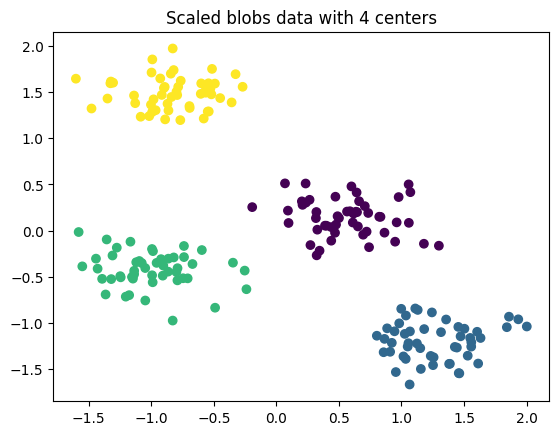

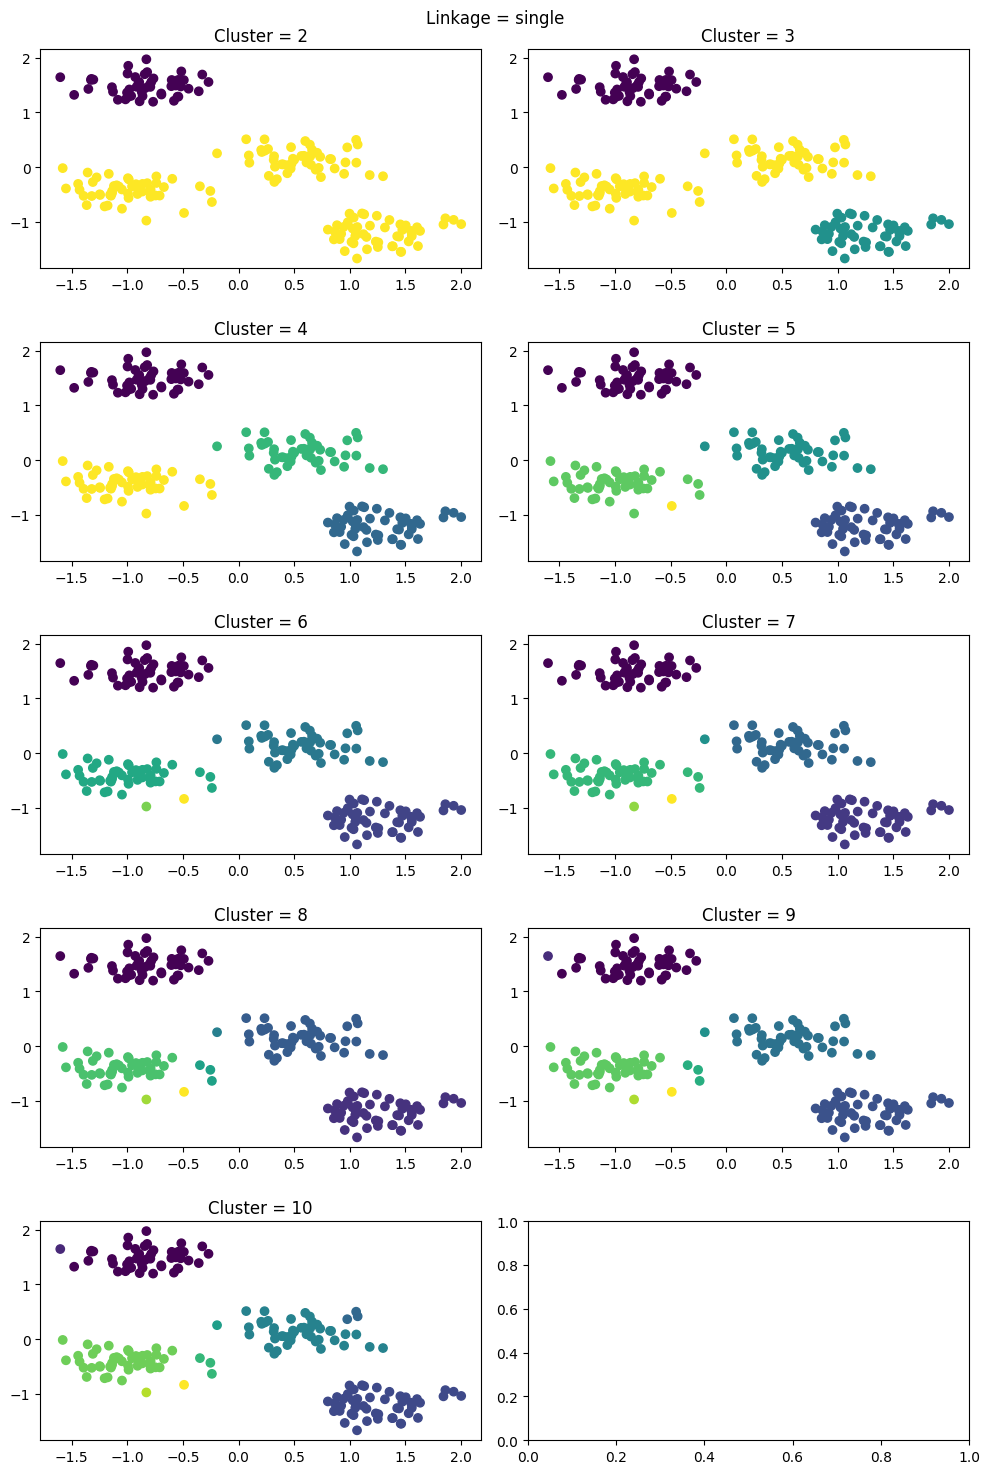

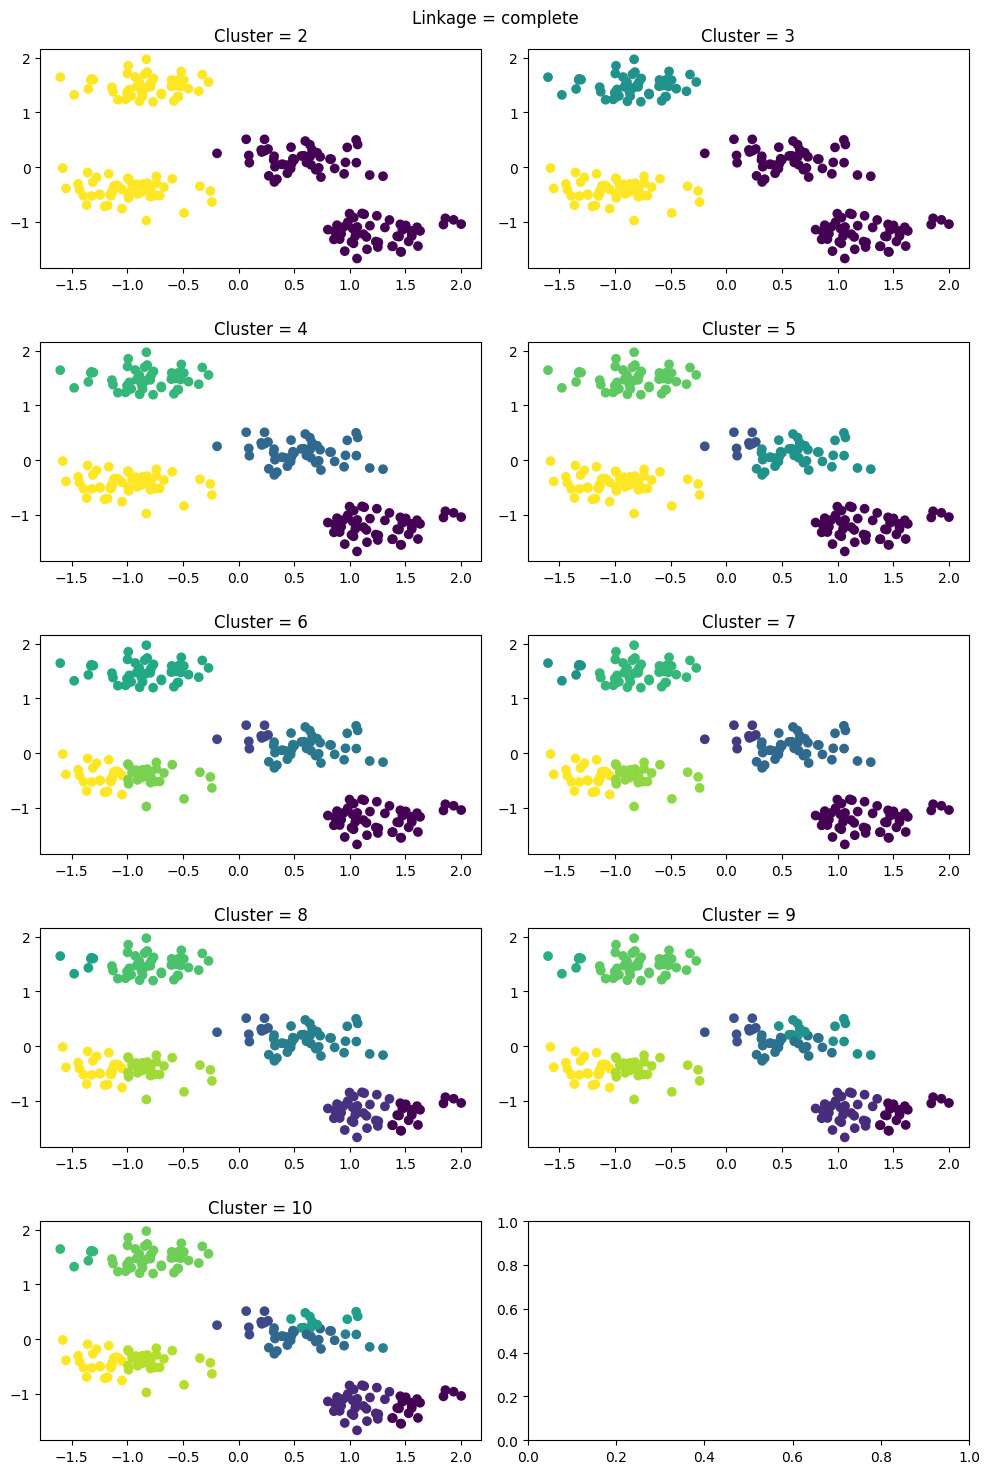

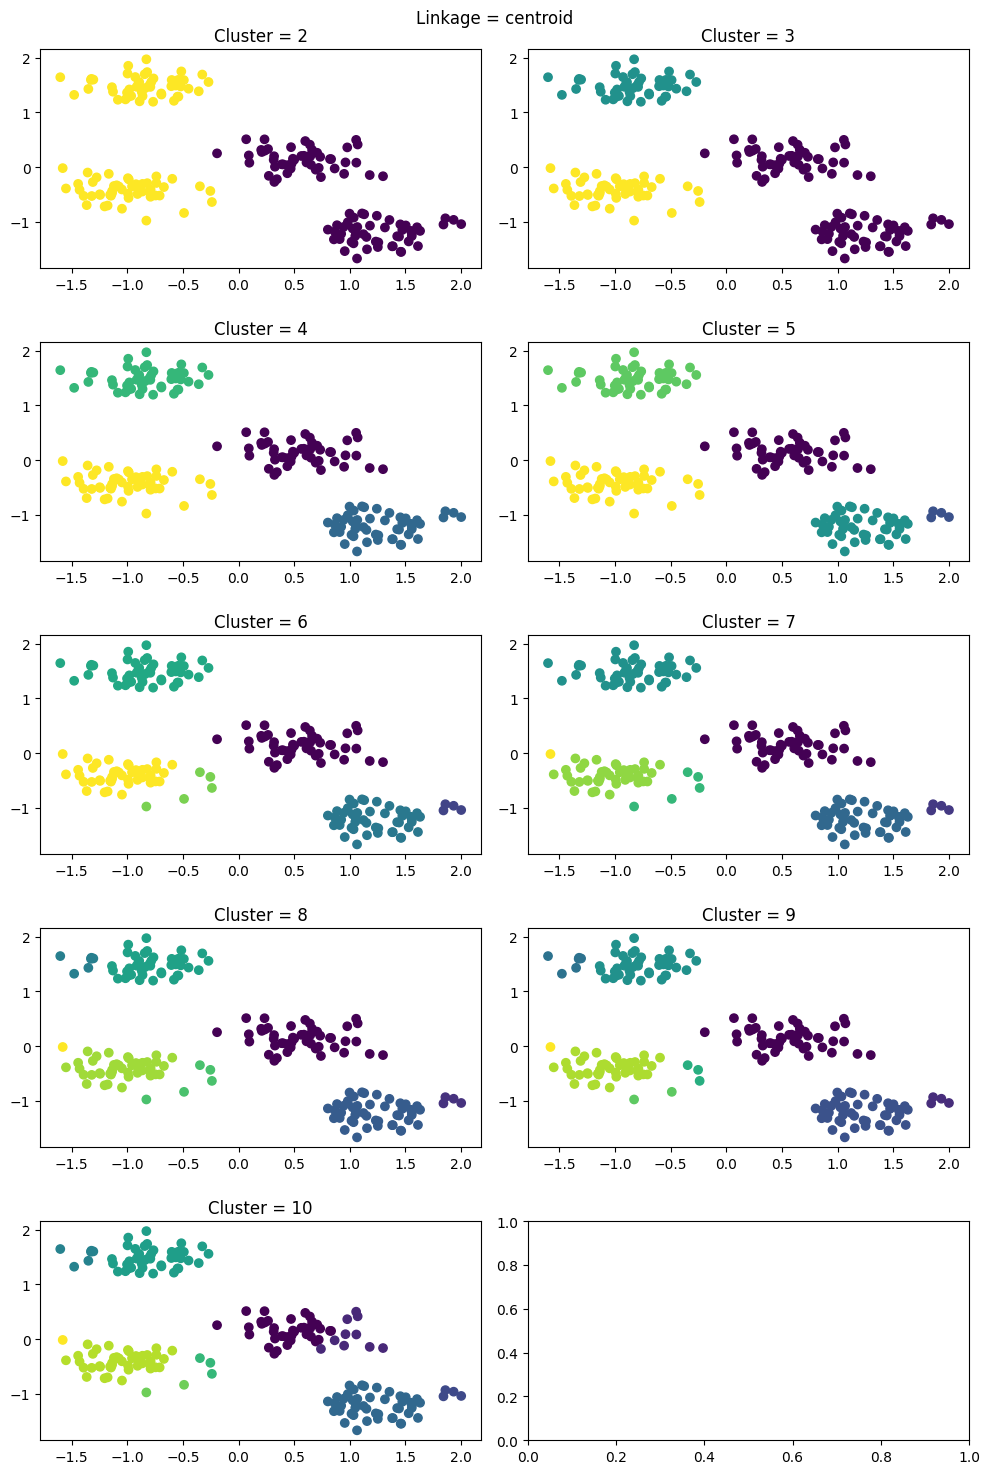

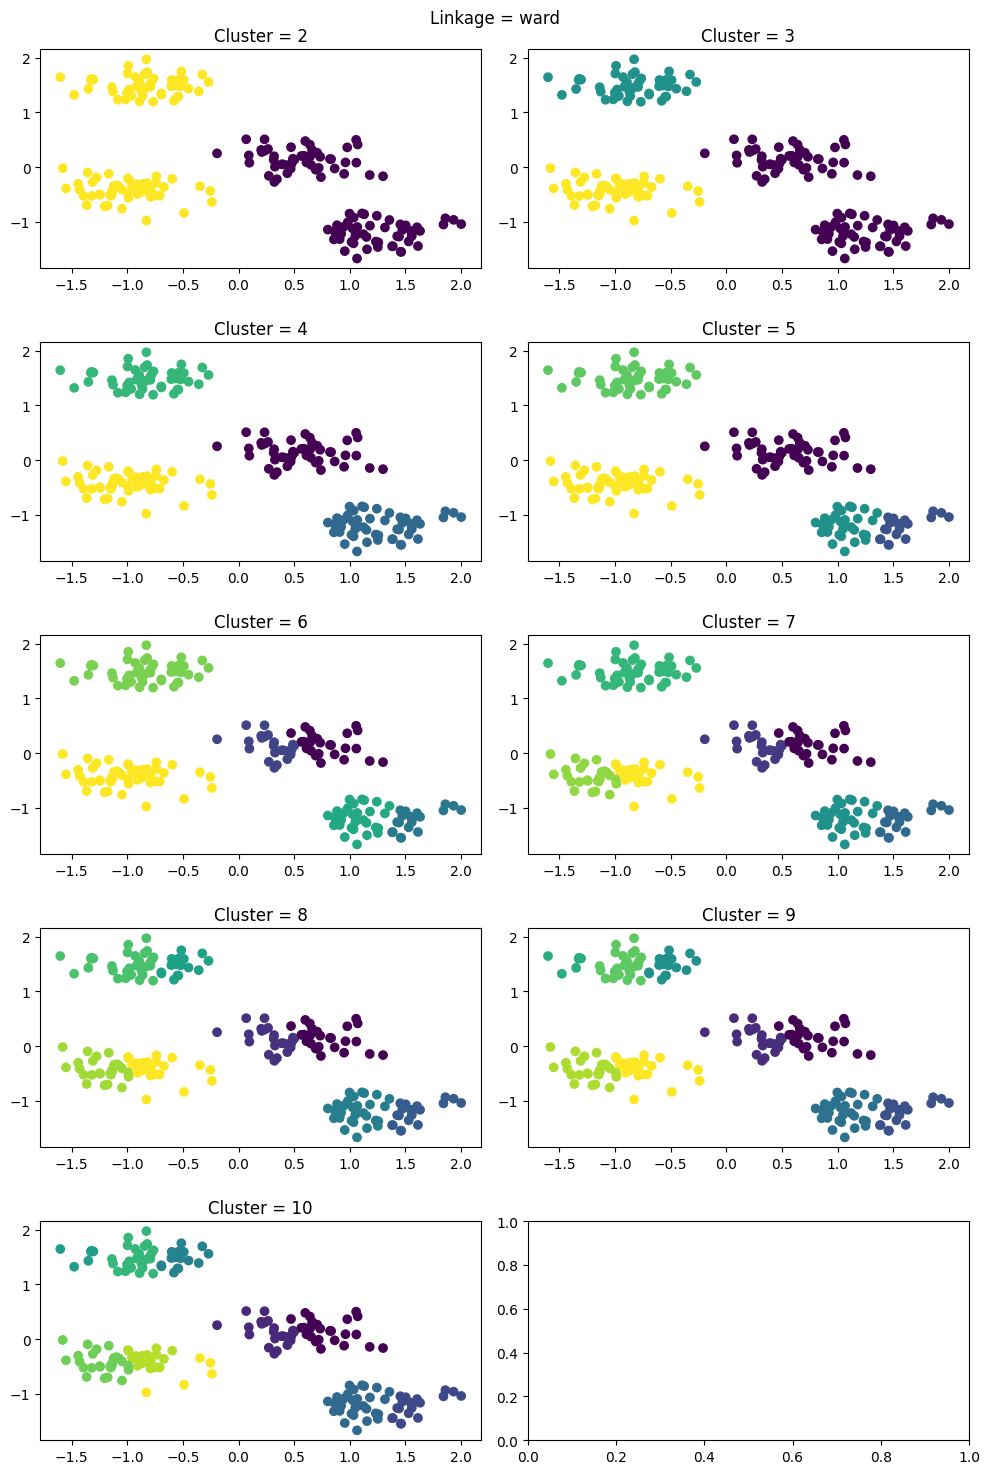

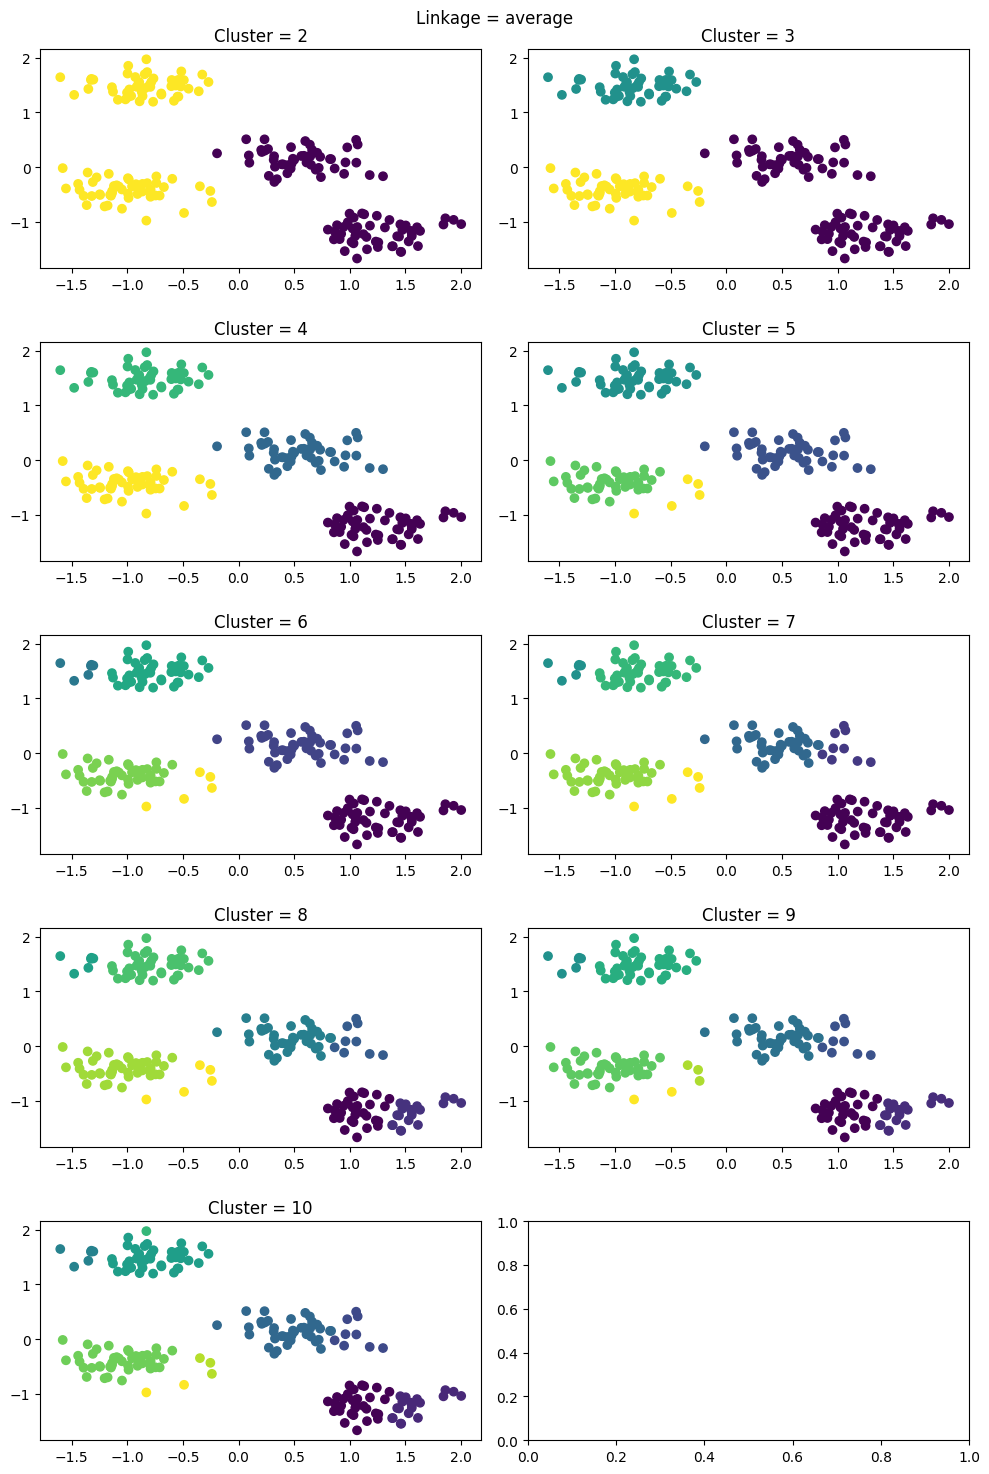

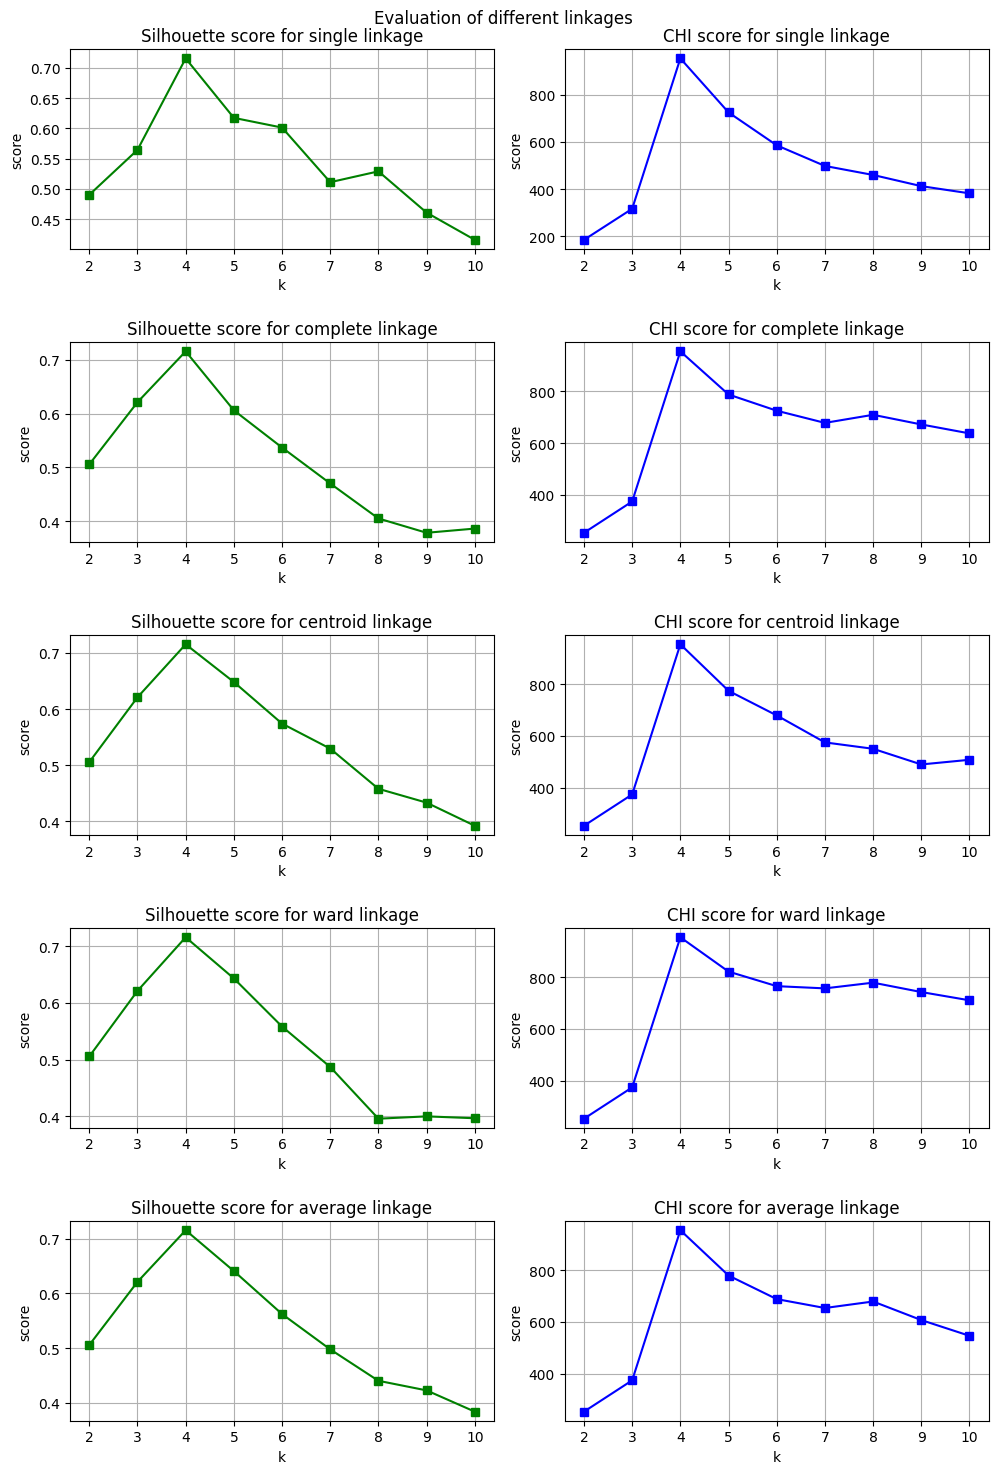

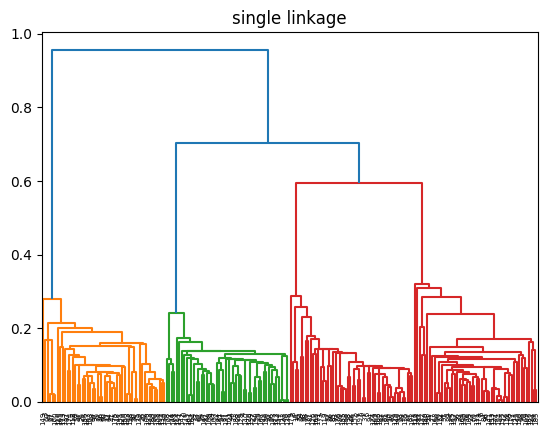

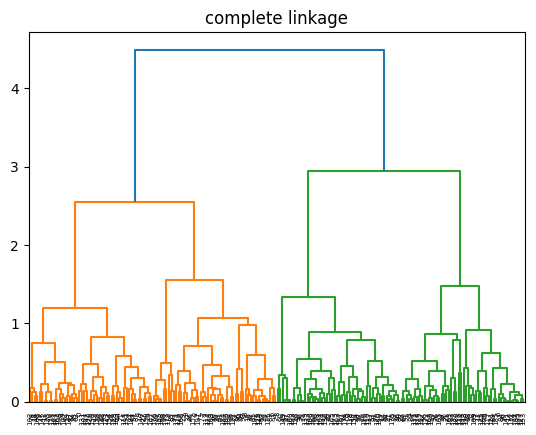

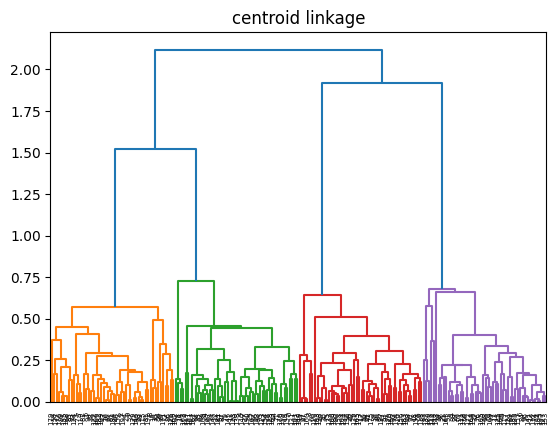

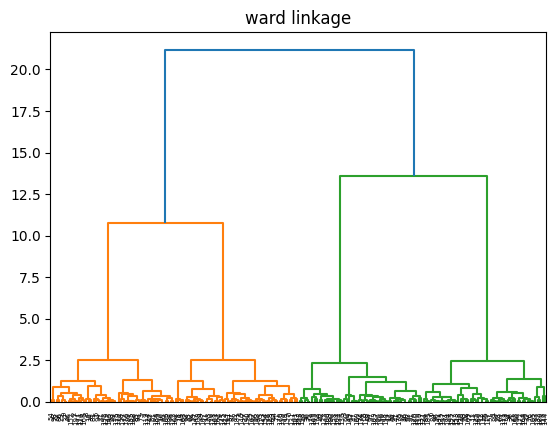

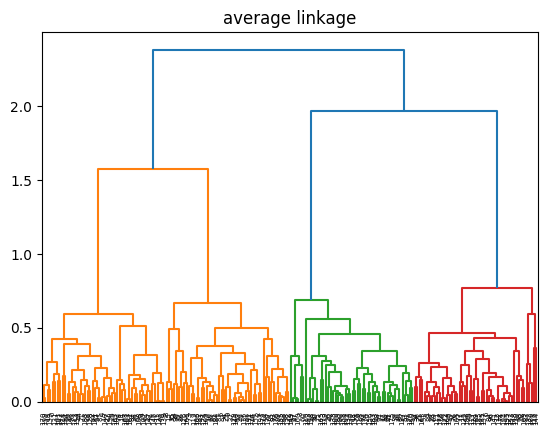

In [4]:
if __name__ == "__main__":
    # Part 1 ==================================================================
    # generate sample data.
    X, y = make_blobs(n_samples=200, centers=4, random_state=0, cluster_std=0.5)

    # scale the data.
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # plot scaled data.
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y)
    plt.title("Scaled blobs data with 4 centers")
    plt.tight_layout
    #plt.savefig("fig/agglo_data.png")
    plt.show()

    # Part 2 ==================================================================
    link_type = ["single", "complete", "centroid", "ward", "average"]
    k_values = list(range(2, 11))
    list_s = []
    list_chs = []
    for link in link_type:
        score_s, score_chs = plot_agglo(X_scaled, link_choice=link)
        #plt.savefig(f"fig/agglo_{link}.png")
        plt.show()
        list_s.append(score_s)
        list_chs.append(score_chs)

    # Part 3 ==================================================================
    fig, axs = plt.subplots(5, 2)
    i = 0
    for link in link_type:
        plotit(
            axs=axs,
            x_data=k_values,
            y_data=list_s[i],
            line="gs-",
            ylabel="score",
            name=f"Silhouette score for {link} linkage",
            row=i,
            col=0,
        )
        plotit(
            axs=axs,
            x_data=k_values,
            y_data=list_chs[i],
            line="bs-",
            ylabel="score",
            name=f"CHI score for {link} linkage",
            row=i,
            col=1,
        )
        i += 1
    fig.set_size_inches(10, 15)
    fig.suptitle("Evaluation of different linkages")
    plt.subplots_adjust(top=0.85)
    fig.tight_layout(h_pad=2)
    #plt.savefig("fig/agglo_score.png")
    plt.show()

    # Part 4 ==================================================================
    for link in link_type:
        Z = linkage(X_scaled, link)
        dendrogram(Z)
        plt.title(f"{link} linkage")
        #plt.savefig(f"fig/dendogram_{link}.png")
        plt.show()


Probelm 2: complex data

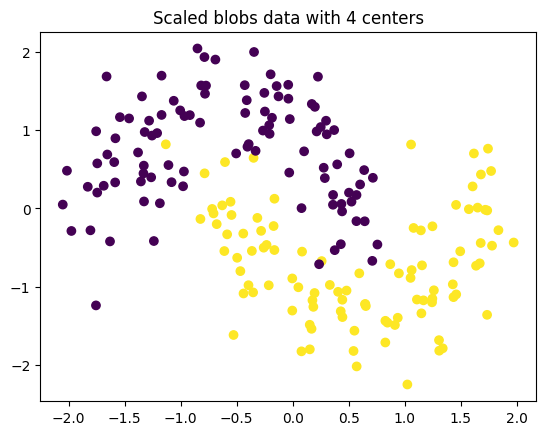

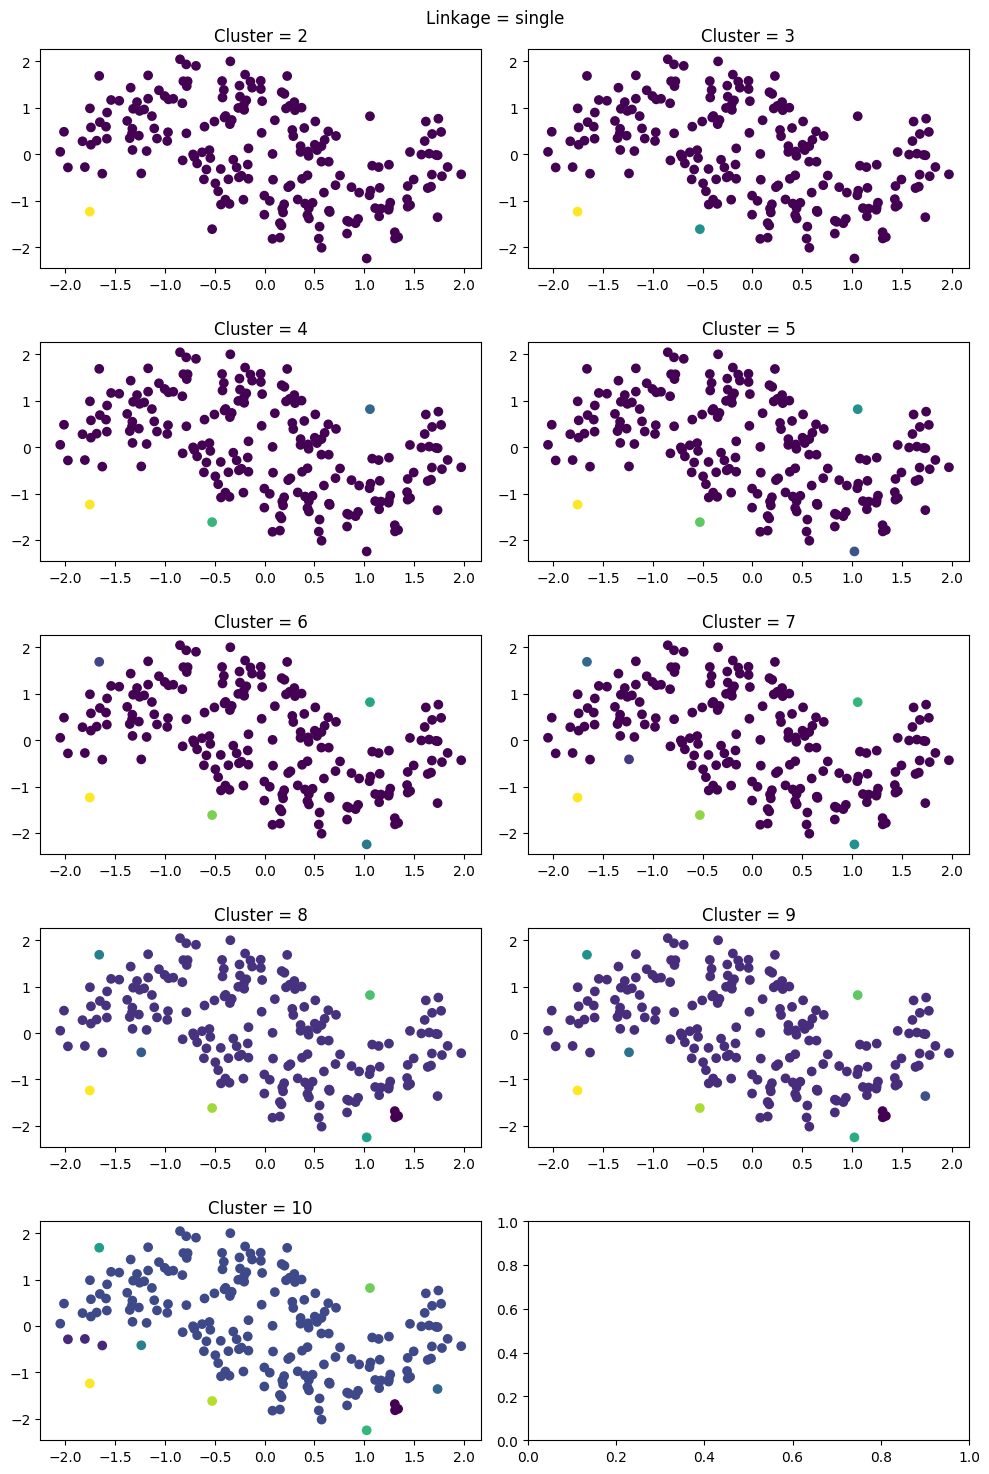

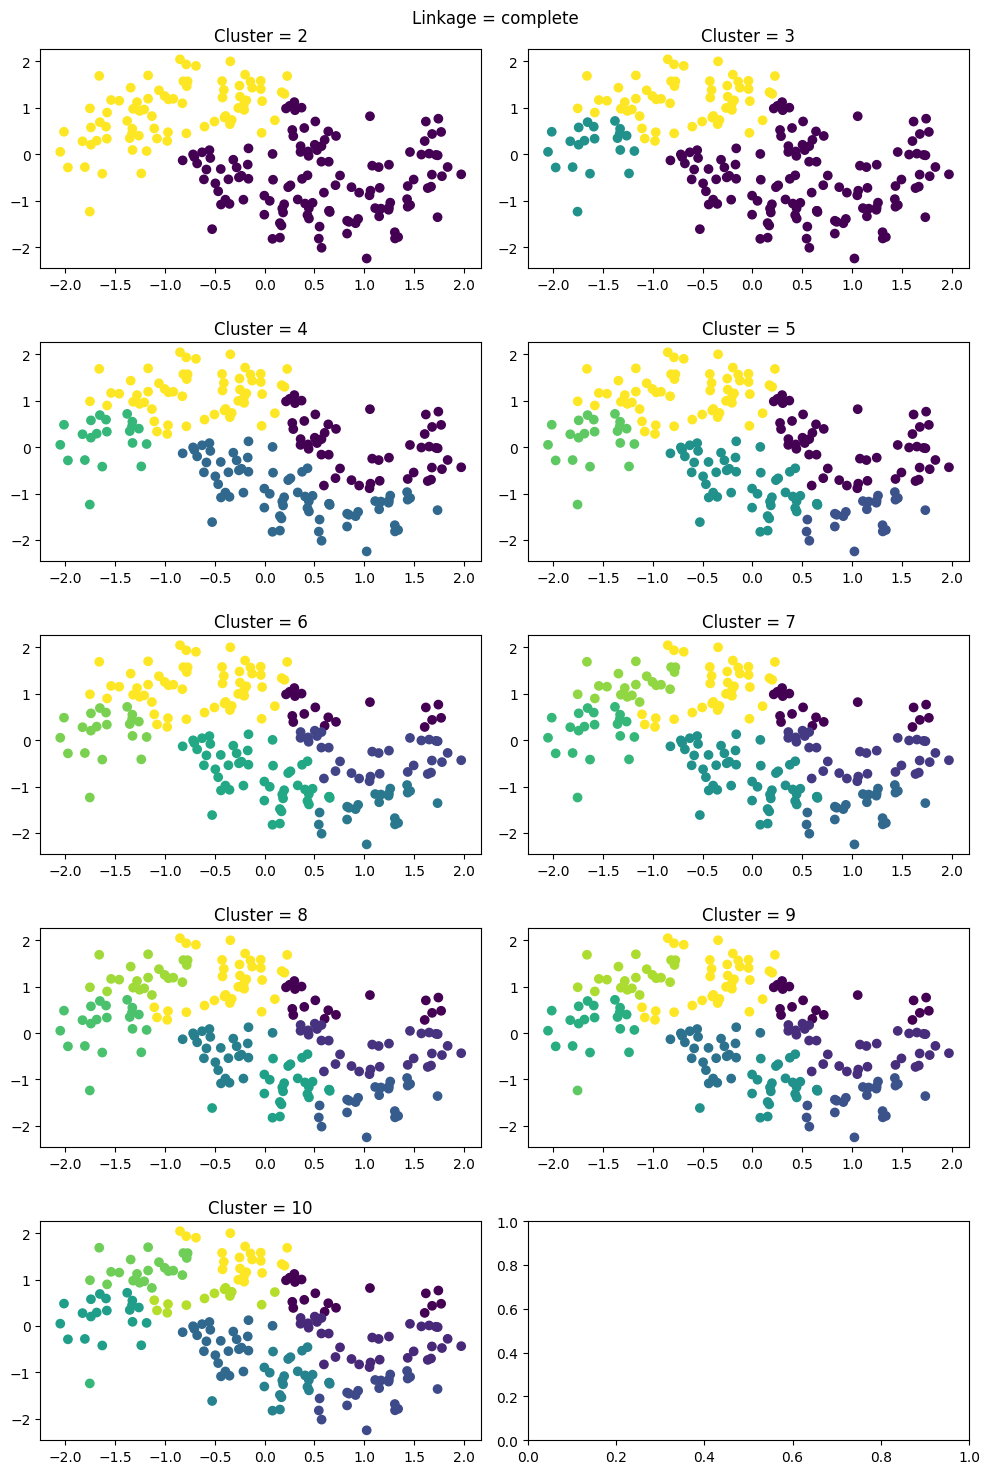

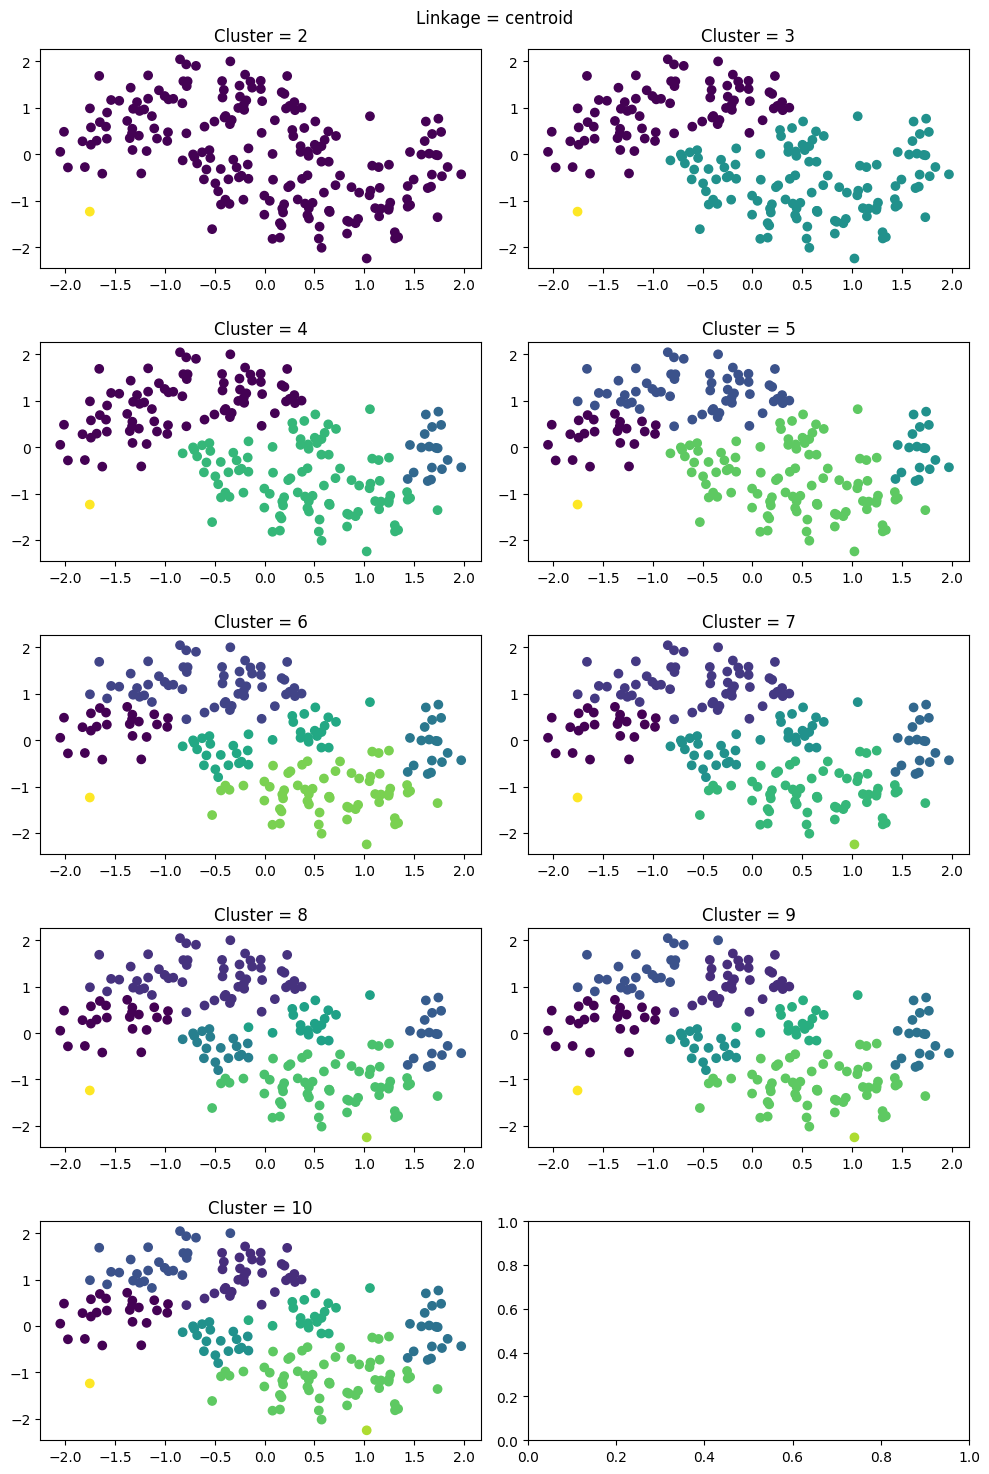

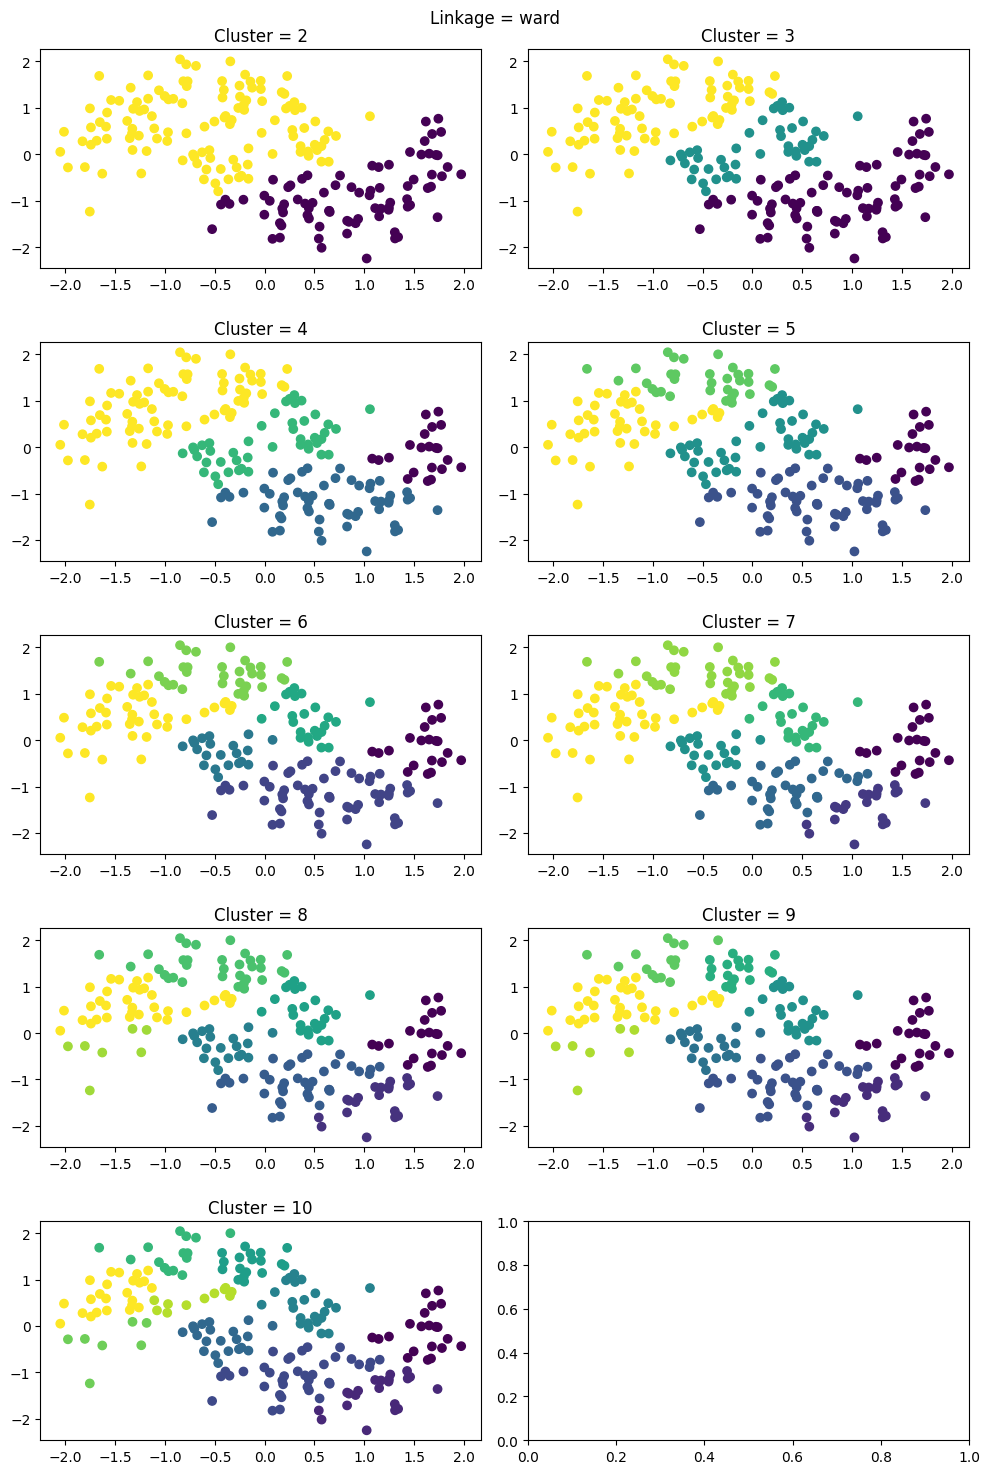

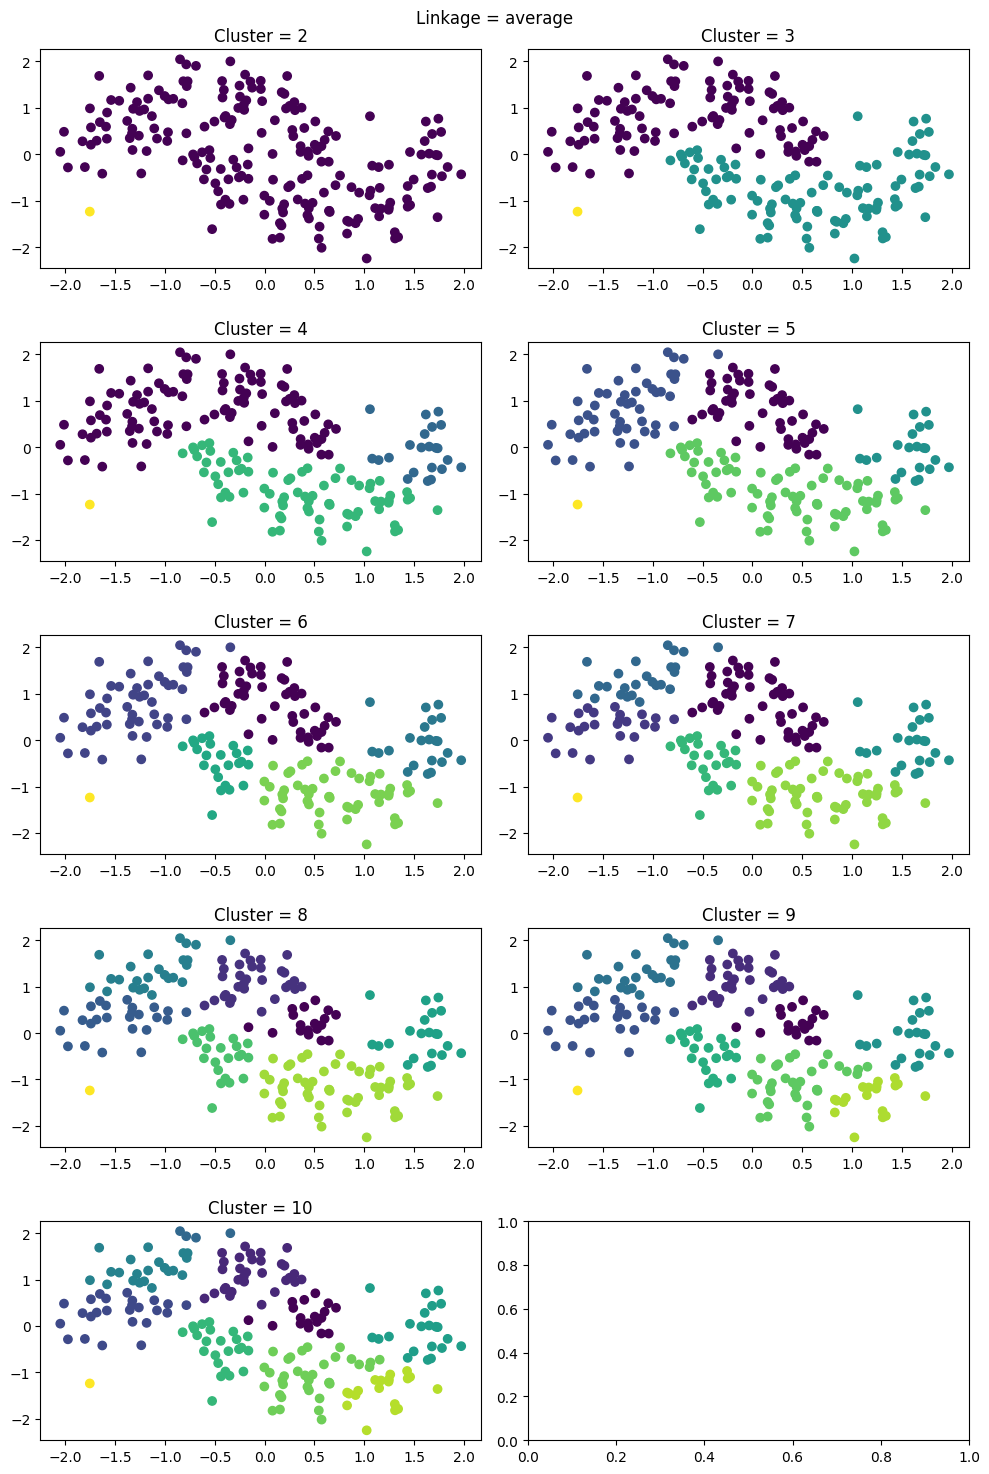

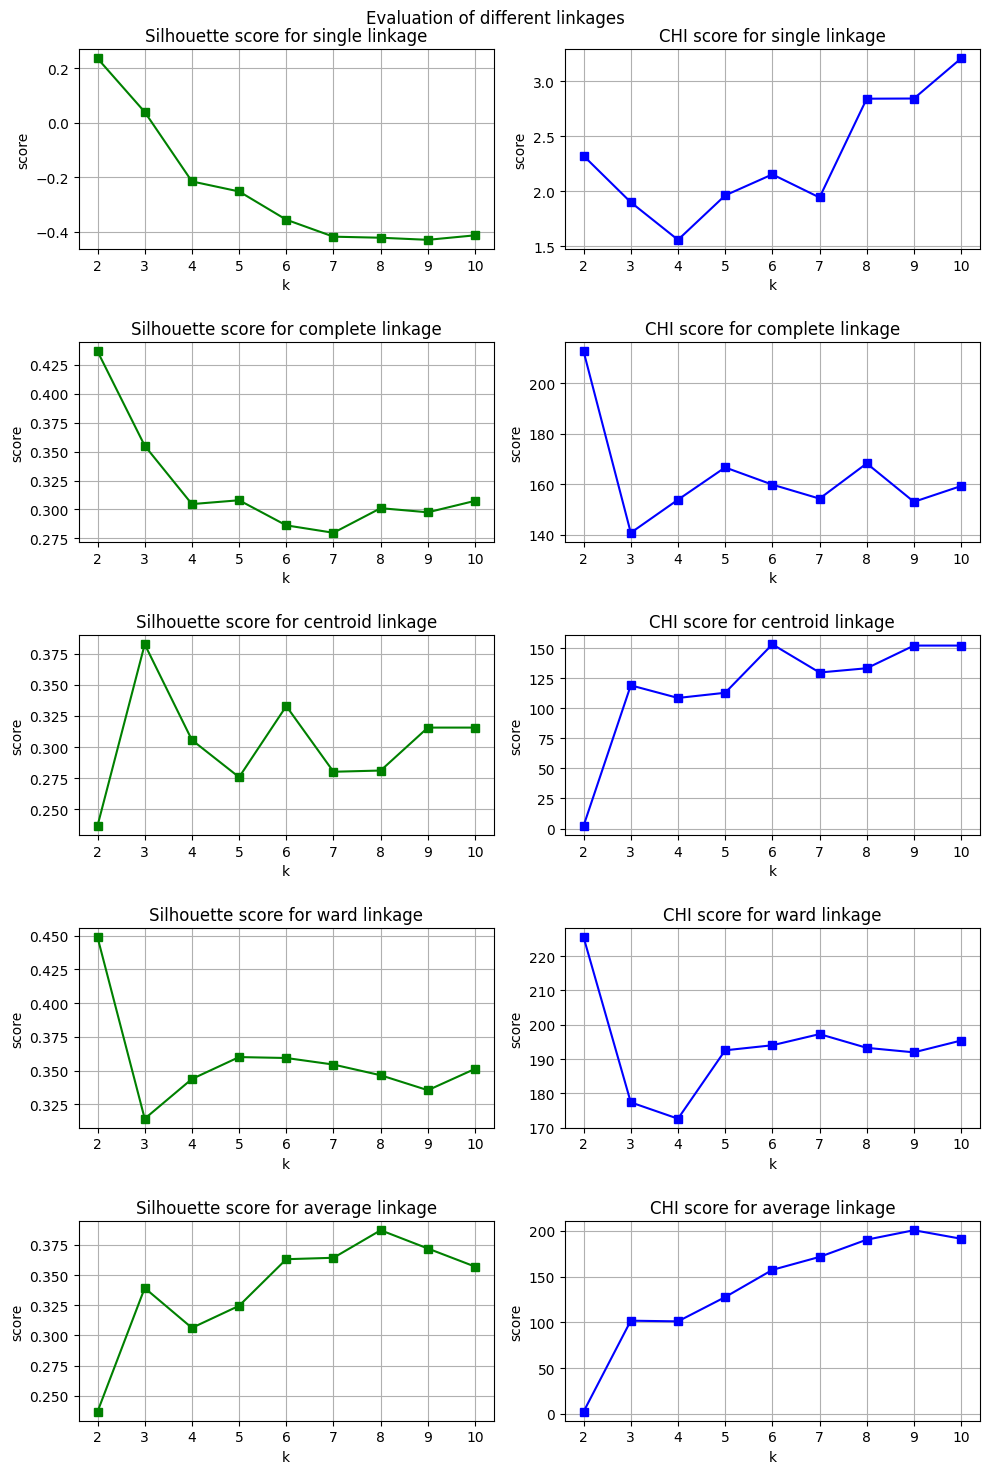

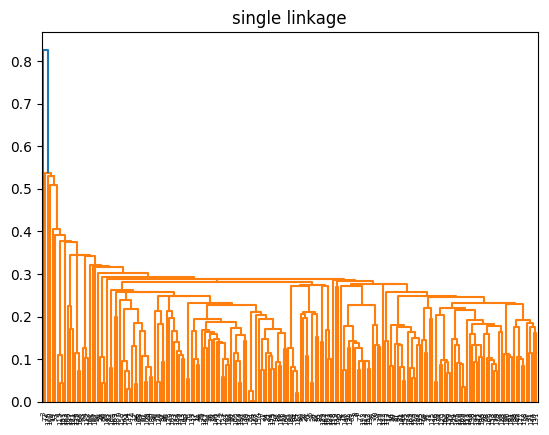

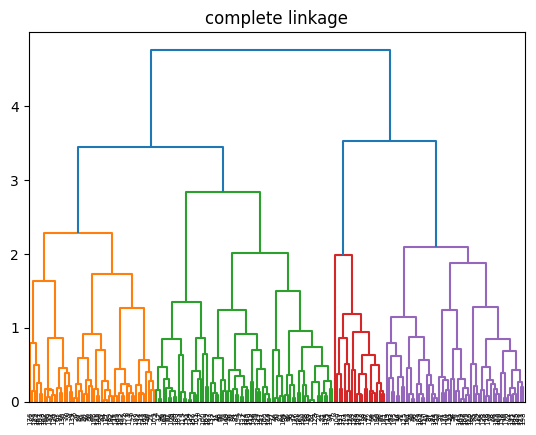

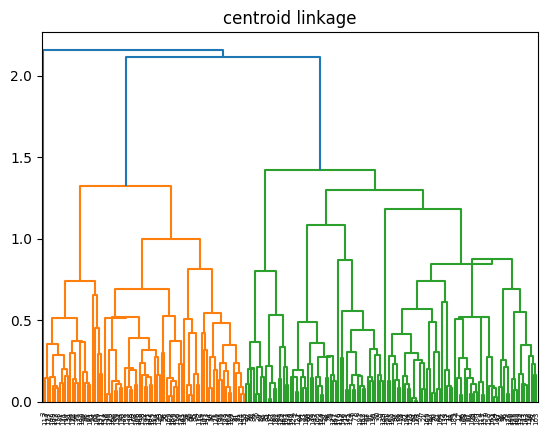

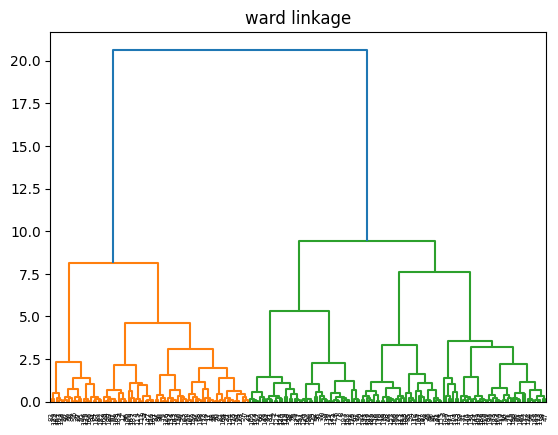

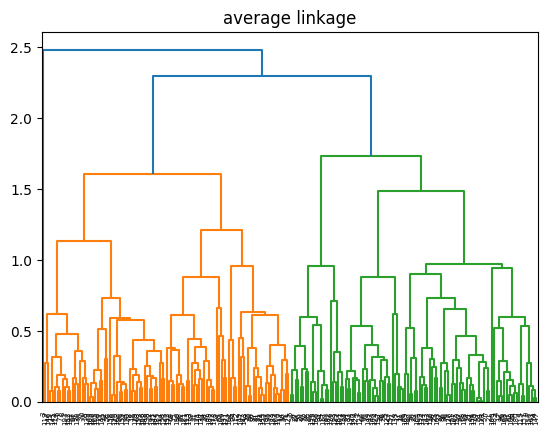

In [5]:
if __name__ == "__main__":
    # Part 1 ==================================================================
    # generate sample data.
    X, y = make_moons(n_samples=200, random_state=0, noise=0.2)

    # scale the data.
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # plot scaled data.
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y)
    plt.title("Scaled blobs data with 4 centers")
    plt.tight_layout
    #plt.savefig("fig/agglo_data.png")
    plt.show()

    # Part 2 ==================================================================
    link_type = ["single", "complete", "centroid", "ward", "average"]
    k_values = list(range(2, 11))
    list_s = []
    list_chs = []
    for link in link_type:
        score_s, score_chs = plot_agglo(X_scaled, link_choice=link)
        # plt.savefig(f"fig/agglo_{link}_c.png")
        plt.show()
        list_s.append(score_s)
        list_chs.append(score_chs)

    # Part 3 ==================================================================
    fig, axs = plt.subplots(5, 2)
    i = 0
    for link in link_type:
        plotit(
            axs=axs,
            x_data=k_values,
            y_data=list_s[i],
            line="gs-",
            ylabel="score",
            name=f"Silhouette score for {link} linkage",
            row=i,
            col=0,
        )
        plotit(
            axs=axs,
            x_data=k_values,
            y_data=list_chs[i],
            line="bs-",
            ylabel="score",
            name=f"CHI score for {link} linkage",
            row=i,
            col=1,
        )
        i += 1
    fig.set_size_inches(10, 15)
    fig.suptitle("Evaluation of different linkages")
    plt.subplots_adjust(top=0.85)
    fig.tight_layout(h_pad=2)
    #plt.savefig("fig/agglo_score_c.png")
    plt.show()

    # Part 4 ==================================================================
    for link in link_type:
        Z = linkage(X_scaled, link)
        dendrogram(Z)
        plt.title(f"{link} linkage")
        #plt.savefig(f"fig/dendogram_{link}_c.png")
        plt.show()
